# Dog App CNN

## Settings

In [1]:
# Package Imports

# import keras
# import matplotlib.pyplot as plt
# from keras.layers import Dense, Dropout, Activation
# from keras.preprocessing.image import ImageDataGenerator
# from keras.models import model_from_json, Model
from PIL import ImageFile
# import numpy as np
# from os import path
import json


# Import Pretrained model
# # from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [2]:
# Object Imports
from module.model import (
    DogAppCNN,
    display_image,
    TRAIN_MEAN,
    TRAIN_STD
)

from configs.config import (
    IMAGE_SIZE,
    NR_EPOCHS,
    NR_CLASSES,
    LEARNING_RATE,
    TRAINING_BATCH_SIZE,
    VAL_TEST_BATCH_SIZE
)

In [3]:
# Working Paths
root_dir = '/data/dog_images/'
train_dir = root_dir + 'train/'
valid_dir = root_dir + 'valid/'
test_dir = root_dir + 'test/'

In [ ]:
# 1) ResNet50
ResNet50_model = {
    "name": "ResNet50",
    "model": ResNet50(weights='imagenet',
                      include_top=False, pooling='avg',
                      input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
}

In [4]:
# 2) VGG16
VGG16_model = {
    "name":"VGG16",
    "model": VGG16(weights='imagenet',
                      include_top=False, pooling='avg',
                      input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
}


## Preprocess Images

In [5]:
# Allow truncated images to be loaded
ImageFile.LOAD_TRUNCATED_IMAGES = True

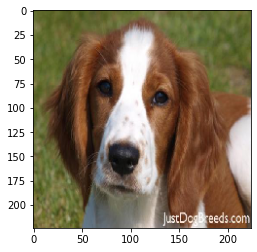

In [6]:
# Image Path
im_path = './images/Welsh_springer_spaniel_08203.jpg'
# im_path = './images/Curly-coated_retriever_03896.jpg'
# im_path = './images/Labrador_retriever_06449.jpg'
# im_path = './images/Brittany_02625.jpg'
image = display_image(im_path)

## Modle Training

In [7]:
# Make dog app instance
DogApp = DogAppCNN(VGG16_model)

In [ ]:
# Train model
model = DogApp.train(model, NR_EPOCHS, LEARNING_RATE, TRAINING_BATCH_SIZE, VAL_TEST_BATCH_SIZE)

## Model Testing

In [ ]:
# Test model
DogApp.test(model, 100)

## Predict an image

In [10]:
labels, names, probs = DogApp.predict_image_from_path(im_path, NR_EPOCHS, LEARNING_RATE, 50)

In [11]:
print(labels, names, probs)

[ 84 129  62] ['Irish Red And White Setter' 'Welsh Springer Spaniel'
 'English Springer Spaniel'] [43.  42.2  7.6]
